In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def drawMatrix(labels, predicts, labels_name, save_file_name):

        num_classes = len(labels_name)
        matrix = np.zeros((num_classes, num_classes), dtype="float32")

        for predict, label in zip(labels, predicts):
            matrix[label, predict] += 1

        # normalize:
        per_sum = matrix.sum(axis=1)
        for i in range(num_classes):
            matrix[i] /= per_sum[i]
        matrix=np.around(matrix, 2)
        
        plt.figure(figsize=(2, 2), dpi=600)
        plt.imshow(matrix, alpha=0.75, cmap=plt.cm.GnBu, vmin=0, vmax=1)
        plt.axis('off')
        
        fontFml = 'Times New Roman'
        fontsize = 8
        plt.text(-0.7, 0, labels_name[0], verticalalignment='center', horizontalalignment='center', fontsize=fontsize, family=fontFml)
        plt.text(-0.7, 1, labels_name[1], verticalalignment='center', horizontalalignment='center', fontsize=fontsize, family=fontFml)
        plt.text(0, 1.7, labels_name[0], verticalalignment='center', horizontalalignment='center', fontsize=fontsize, family=fontFml)
        plt.text(1, 1.7, labels_name[1], verticalalignment='center', horizontalalignment='center', fontsize=fontsize, family=fontFml)
        
        for x in range(num_classes):
            for y in range(num_classes):
                value = float(format('%.2f' % matrix[y, x]))  
                plt.text(x, y, value, verticalalignment='center', horizontalalignment='center', fontsize=12, family=fontFml)

        plt.tight_layout()

#         plt.colorbar()
        plt.savefig(save_file_name, bbox_inches='tight', dpi=600, format='jpg')
        plt.show()
        
        return matrix

In [3]:
data = np.load('data/oversampled_data.npy', allow_pickle=True)
gene = np.load('data/geneAfterDiscard_0.npy', allow_pickle=True)

feature = data[:, :-1]
label = data[:, -1]
print(gene.shape)
print(feature.shape)
print(label.shape)

(11959,)
(296, 11959)
(296,)


In [4]:
# Take out the gene of choice.

fina_gene = ['SPAG1', 'FIGN', 'NUBPL', 'CHMP5', 'TCF7L2', 'COQ10B', 'BSDC1', 'ZFPM1', 'GRPEL1']
gene_idx = []
for g in fina_gene:
    gene_idx.append(np.where(gene==g)[0][0])
gene_idx = np.array(gene_idx)

fina_feature = feature[:, gene_idx]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fina_feature, label, test_size=0.3, shuffle=True, random_state=2022)

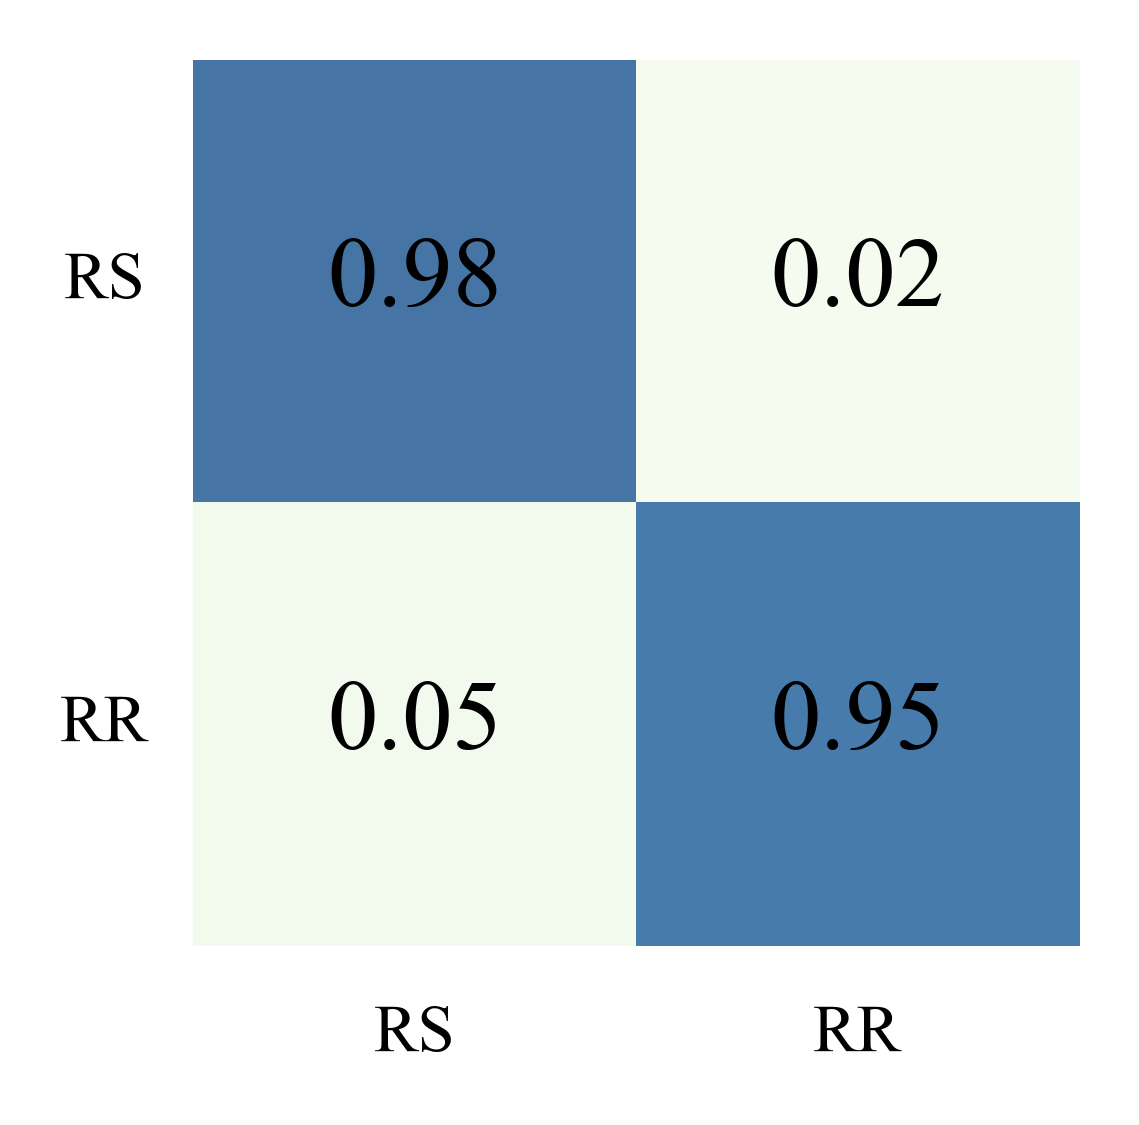

[[0.98 0.02]
 [0.05 0.95]]


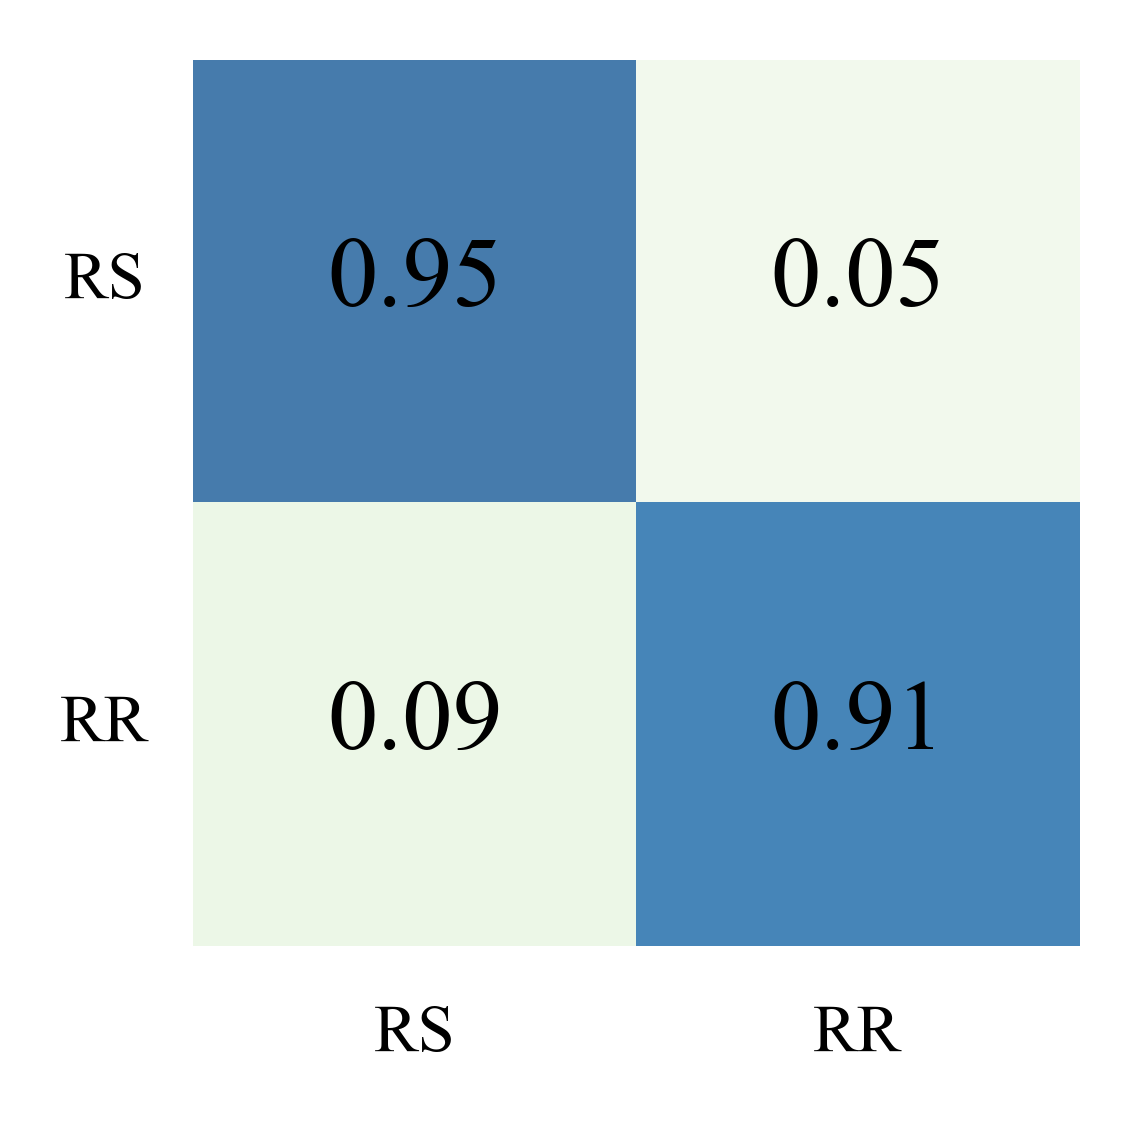

[[0.95 0.05]
 [0.09 0.91]]


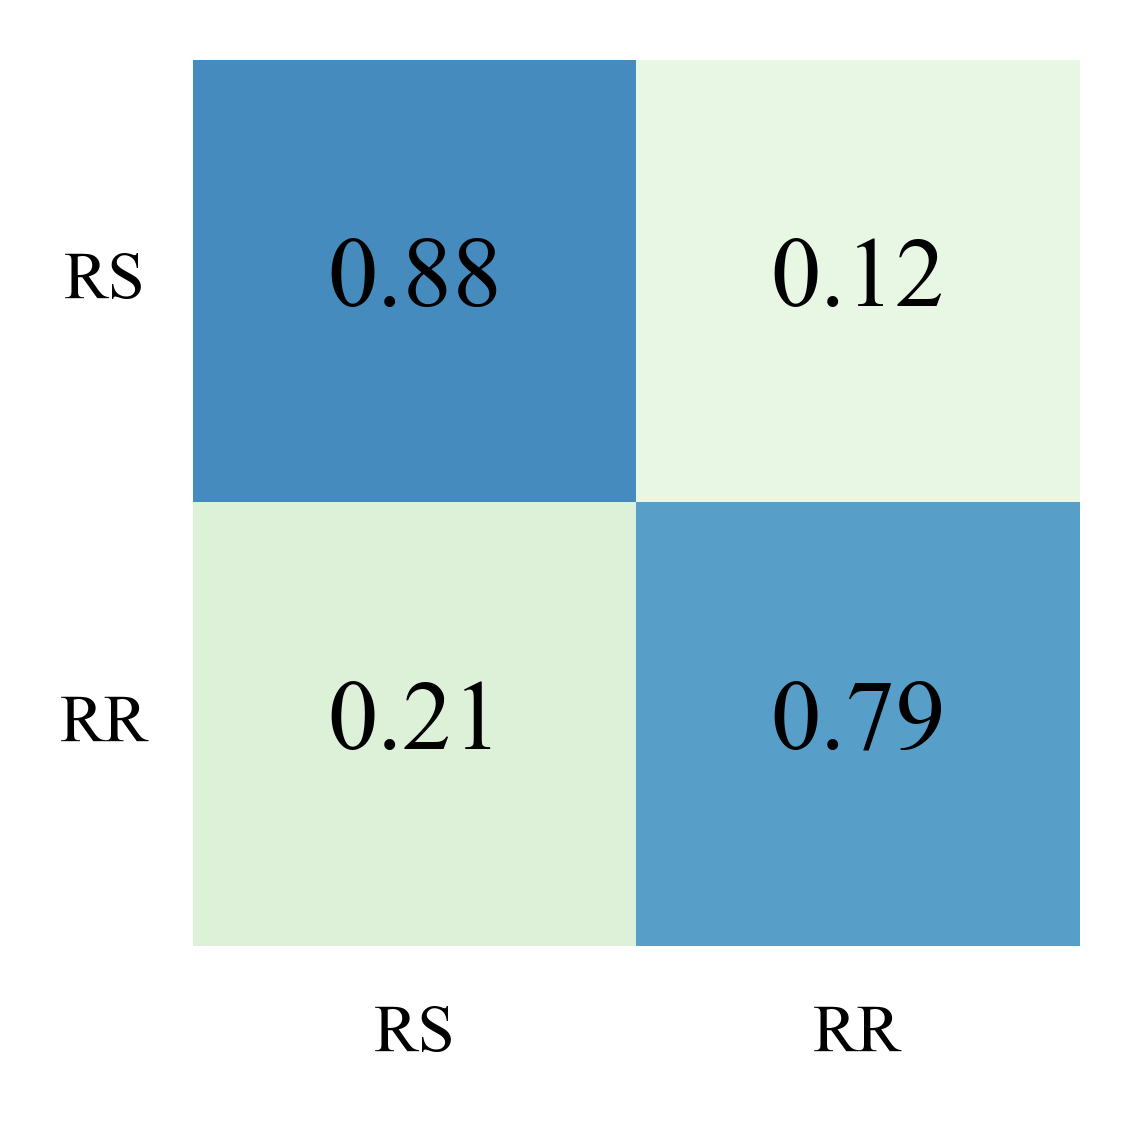

[[0.88 0.12]
 [0.21 0.79]]


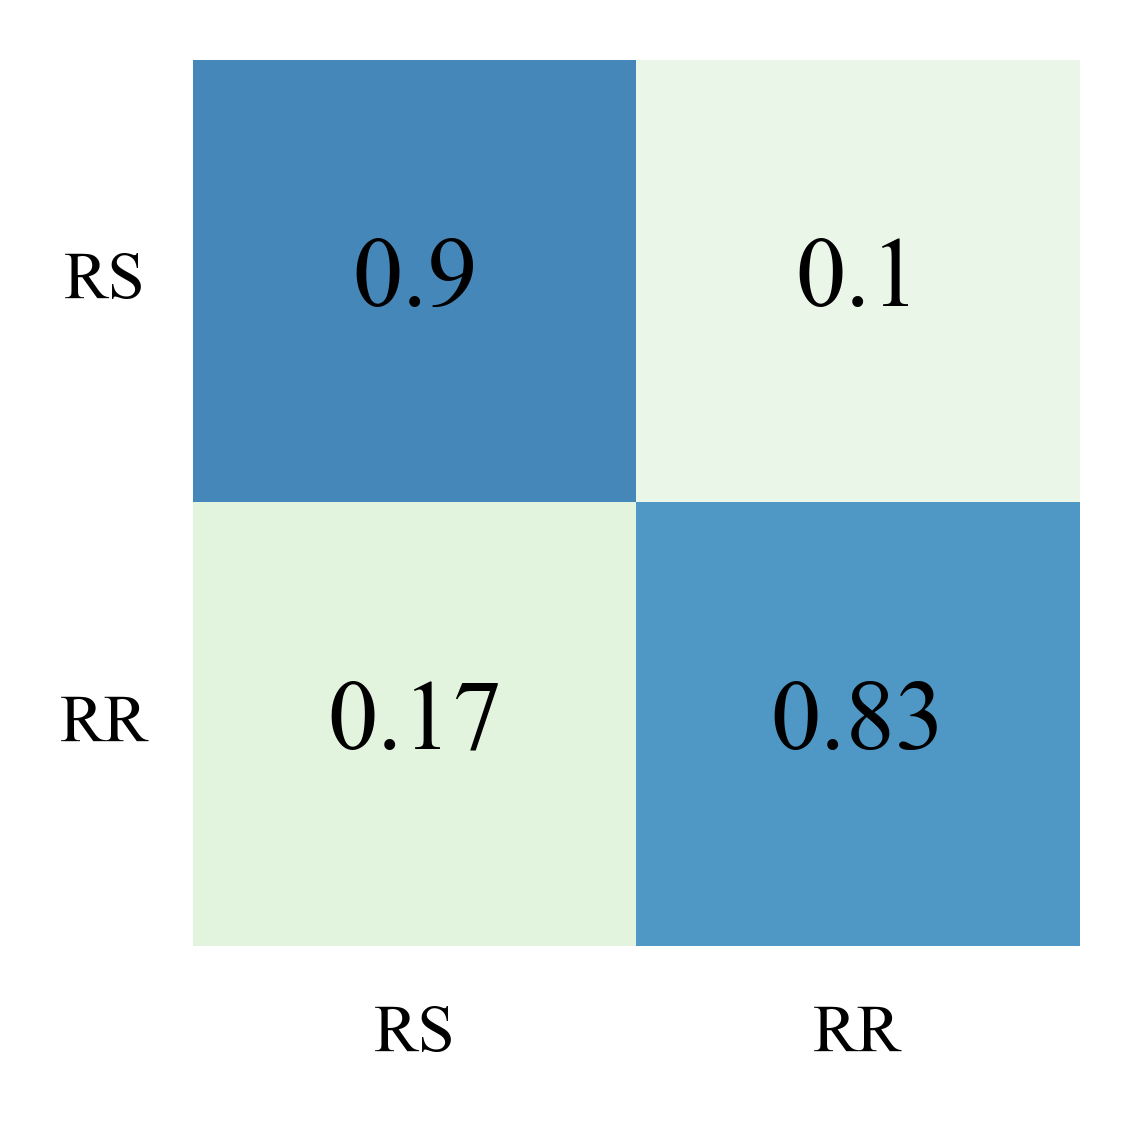

[[0.9  0.1 ]
 [0.17 0.83]]


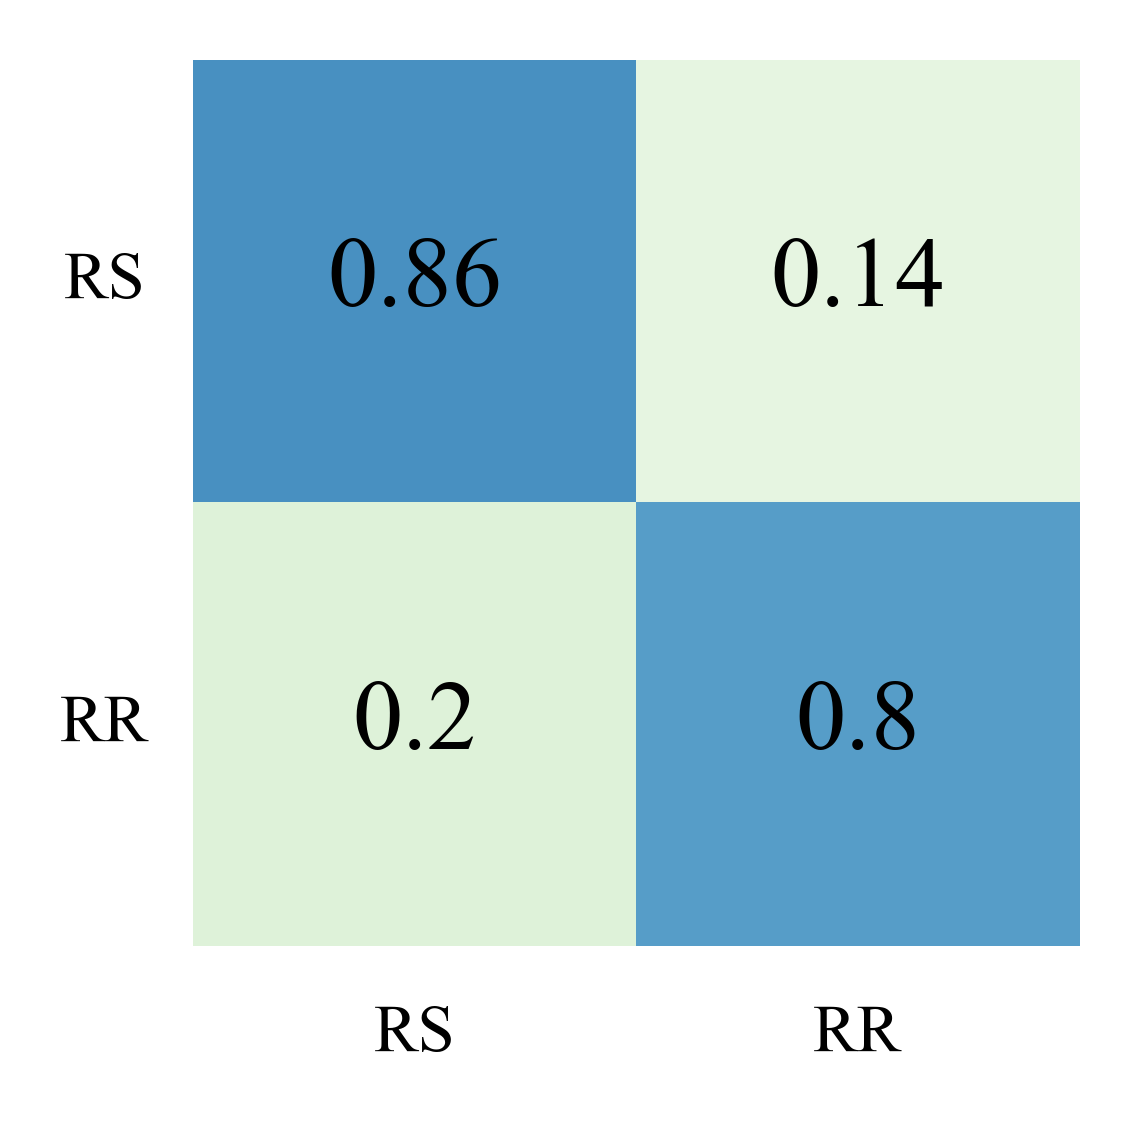

[[0.86 0.14]
 [0.2  0.8 ]]


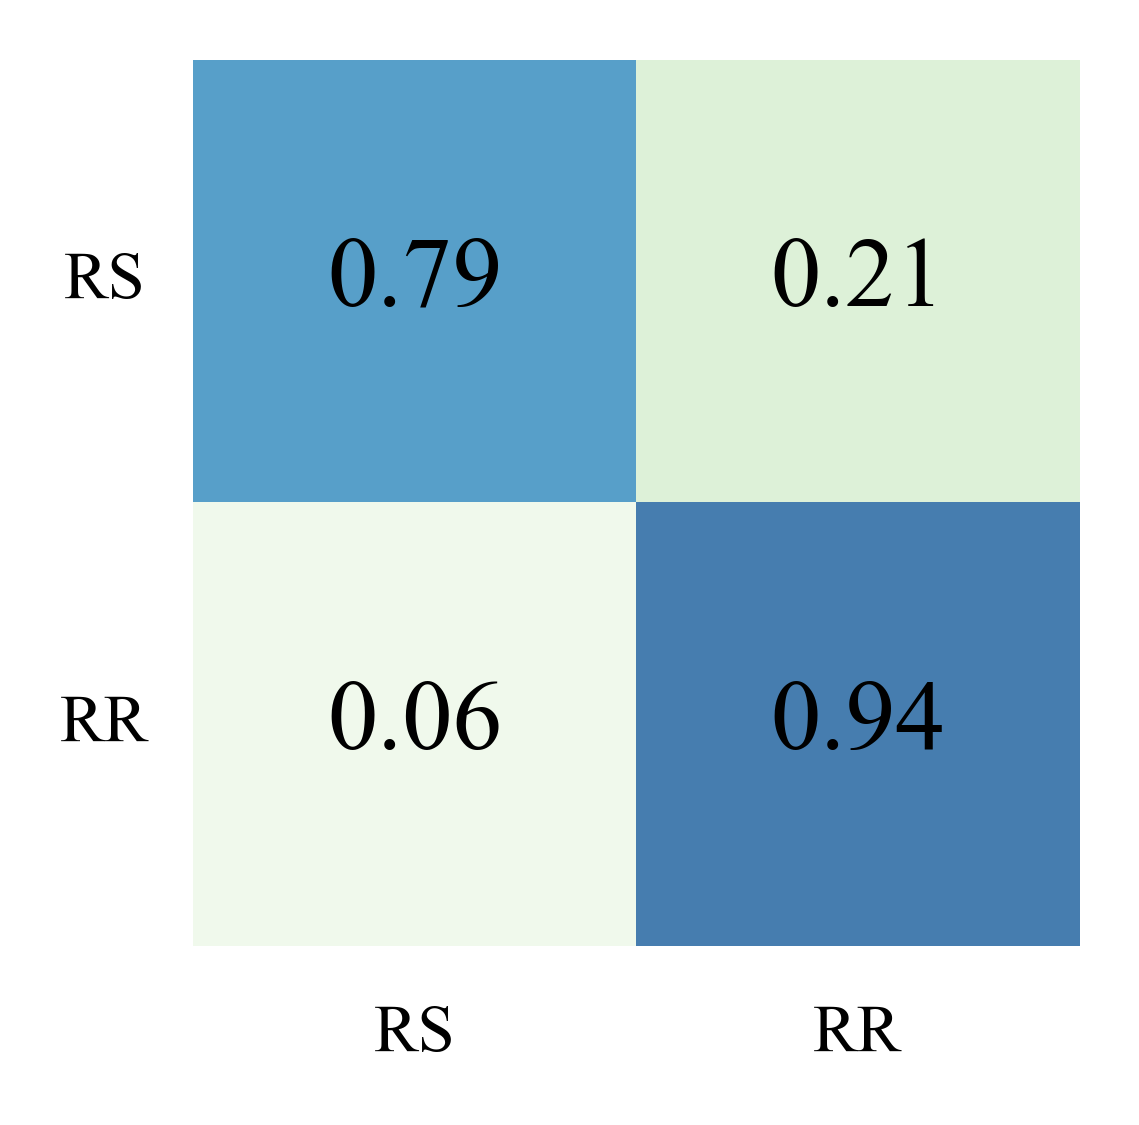

[[0.79 0.21]
 [0.06 0.94]]


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

labels_name = ['RS', 'RR']

clfs = [RandomForestClassifier(),
        GradientBoostingClassifier(),
        svm.SVC(),
        LogisticRegression(),
        KNeighborsClassifier(),
        MLPClassifier(hidden_layer_sizes=(180, 180, 60, 50), max_iter=300)
       ]

for clf in clfs:
    
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)

    predict_np = np.array(y_pred, dtype=np.int64)
    labels_np = np.array(y_test, dtype=np.int64)
    
    clf_name = str(type(clf)).strip('>').strip('\'').split('.')[-1]
    confusion_mat = drawMatrix(labels_np, predict_np, labels_name, f'result_image/confusion_matrix_{clf_name}_.jpg')
    print(confusion_mat)
